In [9]:
import pandas as pd
import numpy as np

In [16]:
import matplotlib.pyplot as plt

In [67]:
train_set = pd.read_csv("archive/train.csv")

In [68]:
train_set.shape

(103904, 25)

In [69]:
test_set = pd.read_csv("archive/test.csv")

In [70]:
test_set.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [53]:
test_set.shape

(25976, 25)

In [54]:
train_set.head(2)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [55]:
train_set.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [56]:
len(train_set.columns)

25

In [73]:
x =train_set[train_set.columns[8:22]]

In [74]:
x.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3


In [75]:
x.shape

(103904, 14)

<Axes: >

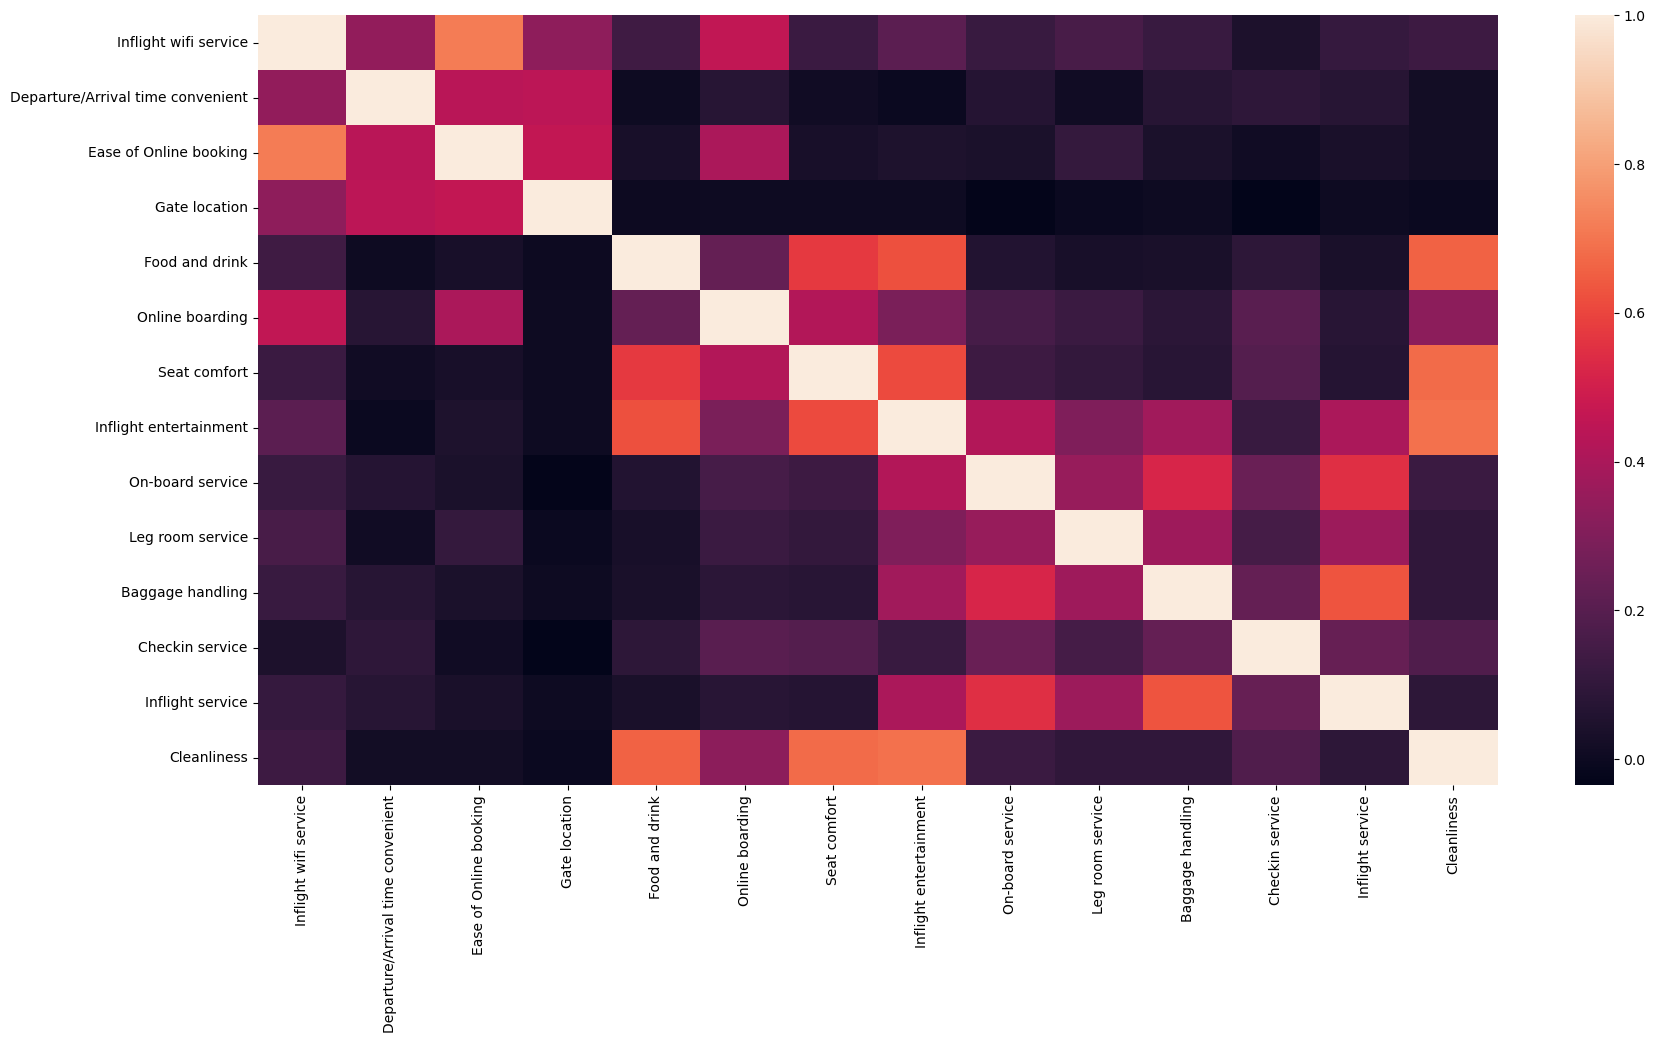

In [76]:
import seaborn as sns
plt.figure(figsize=(20,10))
c = x.corr()
sns.heatmap(c)

### Factor Analysis

In [77]:
from factor_analyzer import FactorAnalyzer

In [78]:
fa = FactorAnalyzer()
fa.fit(x,10)

FactorAnalyzer(rotation_kwargs={})

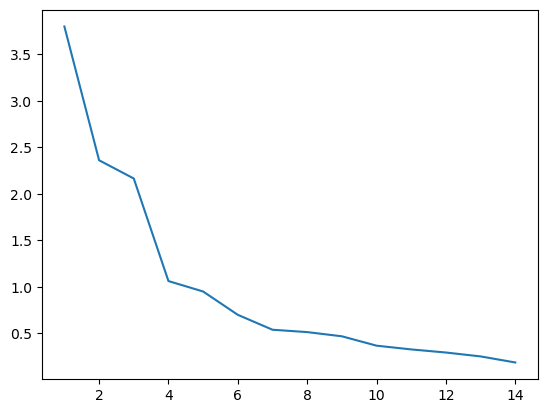

In [79]:
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [82]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(x)
loads = fa.loadings_
print(loads)

[[ 0.16826952  0.12827119  0.75809134]
 [-0.02950837  0.05968117  0.50138365]
 [ 0.03023106  0.02091435  0.93277526]
 [-0.0338282  -0.03231121  0.50404385]
 [ 0.75263893  0.01094635  0.00616734]
 [ 0.39545345  0.1138114   0.35906543]
 [ 0.78999049  0.08146326  0.02725824]
 [ 0.7456934   0.46674984  0.01203424]
 [ 0.09388069  0.70115382  0.02900913]
 [ 0.07445487  0.48144209  0.08065029]
 [ 0.02346305  0.76474833  0.02769279]
 [ 0.14351222  0.28418169  0.02888186]
 [ 0.01813146  0.79977083  0.01825226]
 [ 0.85842046  0.08814824 -0.00170807]]


In [83]:
!pip install pingouin
import pingouin as pg

  Obtaining dependency information for pingouin from https://files.pythonhosted.org/packages/35/2e/8ca90e7edc93bc3d3bdf6daa6d5fc5ae4882994171c3db765365227e1d58/pingouin-0.5.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pandas-flavor from https://files.pythonhosted.org/packages/67/1a/bfb5574b215f530c7ac5be684f33d60b299abbebd763c203aa31755f2fb2/pandas_flavor-0.6.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.2 MB/s eta 0:00:0000:010:01
(0.8762877916624099, array([0.875, 0.878])) (0.7942916933090214, array([0.792, 0.796])) (0.7679754211110683, array([0.766, 0.77 ]))


In [84]:
#Create the factors
factor1 = df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]
#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)

(0.8762877916624099, array([0.875, 0.878])) (0.7942916933090214, array([0.792, 0.796])) (0.7679754211110683, array([0.766, 0.77 ]))
